# Identify optimal frequency bandwidth by cross-validation

To determine the optimal frequency bandwidth for the fitness model, I ran estimated frequencies for a range of bandwidths, ran the fitness model with the LBI predictor for each frequency bandwidth, and calculated the mean sum of squared errors (MSE) across all non-overlapping clades in all test intervals. I identified the optimal frequency bandwidth as the value that minimizes the MSE.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

plt.style.use("huddlej")

In [3]:
df = pd.read_table("model_validation_by_bandwidth.tab", keep_default_na=False, na_values="N/A")

In [4]:
df.head()

,bandwidth,fn,fp,last_training_timepoint,n_samples,parameter-lbi,predictors,sae,sample,sse,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0.02,0,0,2011.25,4,0.241772,lbi,0.490689,0,0.105426,2012.25,1.000000,0.997924,3,1,0.123238,0.059932,9,92,2006-2018
1,0.02,0,4,2011.75,14,0.156034,lbi,1.524168,0,0.663581,2012.75,0.471405,0.455249,8,2,0.094996,0.055271,10,92,2006-2018
2,0.02,0,7,2012.25,13,0.246113,lbi,0.861301,0,0.102222,2013.25,0.228218,0.387005,5,1,0.137329,0.067898,11,92,2006-2018
3,0.02,0,5,2012.75,16,0.353072,lbi,0.917646,0,0.103913,2013.75,0.000000,0.374421,11,0,0.157845,0.119208,12,92,2006-2018
4,0.02,0,6,2013.25,18,0.361483,lbi,1.573332,0,0.765864,2014.25,0.304034,0.273287,11,1,0.158769,0.127371,13,92,2006-2018


In [5]:
df.shape

(77, 20)

In [6]:
df.columns

Index([u'bandwidth', u'fn', u'fp', u'last_training_timepoint', u'n_samples',
       u'parameter-lbi', u'predictors', u'sae', u'sample', u'sse',
       u'test_timepoint', u'testing_accuracy', u'testing_correlation', u'tn',
       u'tp', u'training_accuracy', u'training_correlation',
       u'training_windows', u'viruses', u'year_range'],
      dtype='object')

In [7]:
df.head()

,bandwidth,fn,fp,last_training_timepoint,n_samples,parameter-lbi,predictors,sae,sample,sse,test_timepoint,testing_accuracy,testing_correlation,tn,tp,training_accuracy,training_correlation,training_windows,viruses,year_range
0,0.02,0,0,2011.25,4,0.241772,lbi,0.490689,0,0.105426,2012.25,1.000000,0.997924,3,1,0.123238,0.059932,9,92,2006-2018
1,0.02,0,4,2011.75,14,0.156034,lbi,1.524168,0,0.663581,2012.75,0.471405,0.455249,8,2,0.094996,0.055271,10,92,2006-2018
2,0.02,0,7,2012.25,13,0.246113,lbi,0.861301,0,0.102222,2013.25,0.228218,0.387005,5,1,0.137329,0.067898,11,92,2006-2018
3,0.02,0,5,2012.75,16,0.353072,lbi,0.917646,0,0.103913,2013.75,0.000000,0.374421,11,0,0.157845,0.119208,12,92,2006-2018
4,0.02,0,6,2013.25,18,0.361483,lbi,1.573332,0,0.765864,2014.25,0.304034,0.273287,11,1,0.158769,0.127371,13,92,2006-2018


In [9]:
agg_functions = ["mean", "std"]
np.around(df.groupby("bandwidth").aggregate({
    "testing_accuracy": agg_functions,
    "sse": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("sse", "mean")]), 3)

testing_accuracy           sse        testing_correlation       
                      mean    std   mean    std                mean    std
bandwidth                                                                 
0.50                 0.482  0.465  0.163  0.166               0.560  0.399
0.33                 0.449  0.389  0.217  0.232               0.506  0.345
0.25                 0.371  0.363  0.242  0.249               0.294  0.529
0.16                 0.399  0.472  0.297  0.225               0.368  0.436
0.02                 0.249  0.316  0.316  0.286               0.304  0.353
0.08                 0.369  0.456  0.337  0.220               0.394  0.436
0.04                 0.301  0.333  0.403  0.205               0.369  0.302

In [10]:
error_df = df.groupby("bandwidth").aggregate({"sse": "sum", "sae": "sum", "n_samples": "sum"})

In [11]:
# Calculate mean squared error.
mse = (error_df["sse"] / error_df["n_samples"]).sort_values()
mse

bandwidth
0.33    0.017968
0.50    0.019021
0.16    0.019708
0.25    0.021336
0.02    0.021475
0.08    0.022320
0.04    0.023970
dtype: float64

In [12]:
mse_df = mse.reset_index().rename({0: "mse"}, axis=1)
mse_df

,bandwidth,mse
0,0.33,0.017968
1,0.50,0.019021
2,0.16,0.019708
3,0.25,0.021336
4,0.02,0.021475
5,0.08,0.022320
6,0.04,0.023970


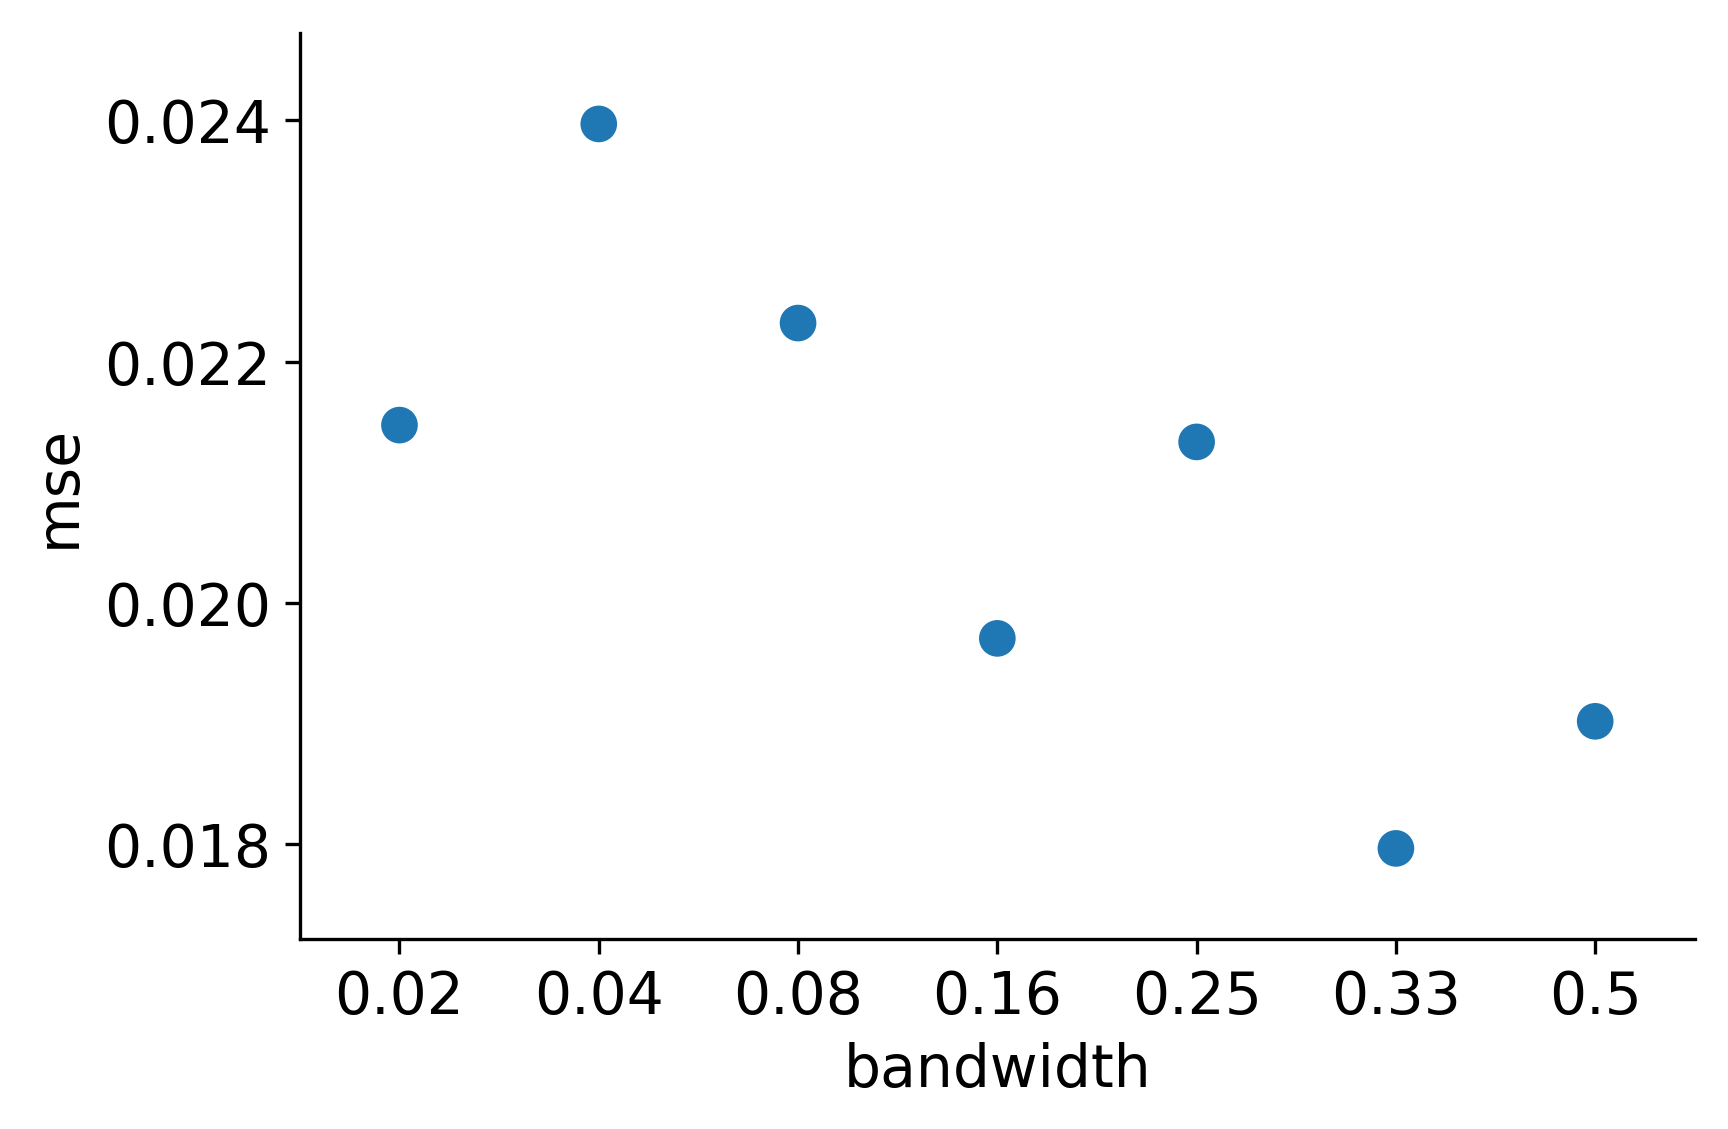

In [14]:
sns.pointplot(
    x="bandwidth",
    y="mse",
    data=mse_df,
    join=False
)

In [15]:
# Calculate mean absolute error
mae = (error_df["sae"] / error_df["n_samples"]).sort_values()
mae

bandwidth
0.33    0.058329
0.50    0.061346
0.16    0.064456
0.25    0.067350
0.08    0.069813
0.04    0.072597
0.02    0.073465
dtype: float64

In [16]:
mae_df = mae.reset_index().rename({0: "mae"}, axis=1)
mae_df

,bandwidth,mae
0,0.33,0.058329
1,0.50,0.061346
2,0.16,0.064456
3,0.25,0.067350
4,0.08,0.069813
5,0.04,0.072597
6,0.02,0.073465


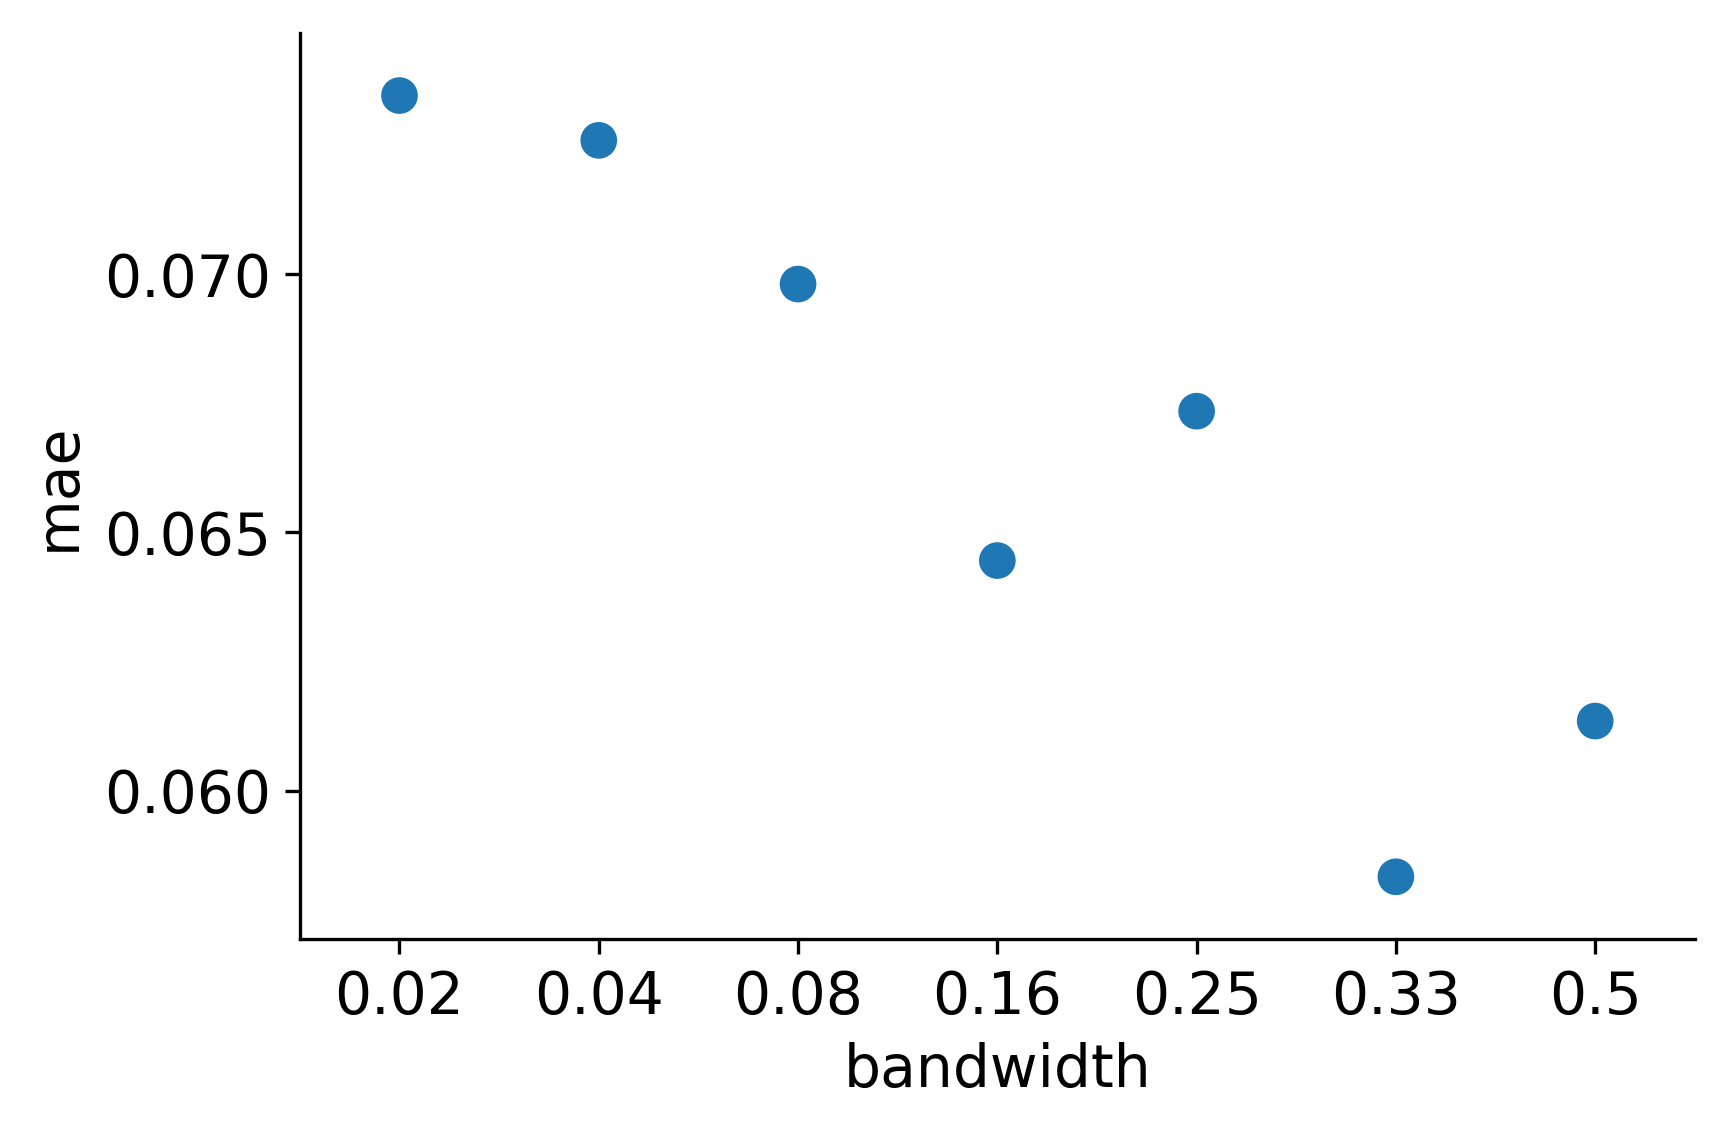

In [18]:
sns.pointplot(
    x="bandwidth",
    y="mae",
    data=mae_df,
    join=False
)